In [21]:
from models import ResNet8, ResNet14, ResNet20, CNN8, CNN14, CNN20
from train_test_functions import training, testing
from torch.utils.data import DataLoader, Subset
from train_test_functions import global_loop
from torch import nn
import numpy as np 
import matplotlib.pyplot as plt
import torch

In [3]:
def get_model(selected_model, model_type):
    if selected_model == 8 and model_type == 'ResNet':
        model = ResNet8()

    elif selected_model == 14 and model_type == 'ResNet':
        model = ResNet14()

    elif selected_model == 20 and model_type == 'ResNet':
        model = ResNet20()

    elif selected_model == 8 and model_type == 'CNN':
        model = CNN8()

    elif selected_model == 14 and model_type == 'CNN':
        model = CNN14()

    elif selected_model == 20 and model_type == 'CNN':
        model = CNN20()

In [12]:
from torchvision import datasets, transforms

def LoadCIFAR10_subset(batch_size, subset):
    """
    Load CIFAR10 dataset
    Parameters
    -----------
    batch-size : int
                 batch-size for mini batch wanted

    subset : int
                size of the subset
    Returns 
    -----------
    Dataloaders
        subset of train dataset and test dataset
    """

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    training_data = datasets.CIFAR10(
        root="data",
        train=True,
        download=True,
        transform=transform
    )

    test_data = datasets.CIFAR10(
        root="data",
        train=False,
        download=True,
        transform=transform
    )

    subset_indices = range(5000)   # indices of the subset
    train_subset = Subset(training_data, subset_indices)

    # create a dataloader for the subset
    train = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test = DataLoader(test_data, batch_size=batch_size, shuffle=True)

    return train, test

Files already downloaded and verified
Files already downloaded and verified
ResNet8 --- Epoch 1/10 --- train loss : 1.85 | train acc : 0.33 | test loss : 1.65 | test acc 0.4 | time spent 25.44
ResNet8 --- Epoch 2/10 --- train loss : 1.57 | train acc : 0.42 | test loss : 1.49 | test acc 0.46 | time spent 25.02
ResNet8 --- Epoch 3/10 --- train loss : 1.41 | train acc : 0.48 | test loss : 1.38 | test acc 0.51 | time spent 24.94
ResNet8 --- Epoch 4/10 --- train loss : 1.3 | train acc : 0.53 | test loss : 1.35 | test acc 0.52 | time spent 24.85
ResNet8 --- Epoch 5/10 --- train loss : 1.23 | train acc : 0.56 | test loss : 1.3 | test acc 0.53 | time spent 25.08
ResNet8 --- Epoch 6/10 --- train loss : 1.15 | train acc : 0.59 | test loss : 1.26 | test acc 0.54 | time spent 24.88
ResNet8 --- Epoch 7/10 --- train loss : 1.07 | train acc : 0.62 | test loss : 1.22 | test acc 0.56 | time spent 24.88
ResNet8 --- Epoch 8/10 --- train loss : 1.02 | train acc : 0.64 | test loss : 1.19 | test acc 0.57 | 

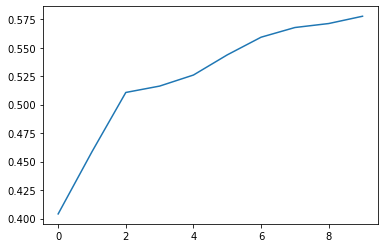

In [22]:
import time

train, test = LoadCIFAR10_subset(batch_size=32, subset=5000)

model = ResNet8()
model_name = "ResNet8"

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

EPOCHS = 10

to_plot = []

for epoch in range(EPOCHS):
    start_time = time.time()


    training_acc, training_loss = training(model, train, optimizer, criterion)
    test_acc, test_loss = testing(model, test, criterion)

    end_time = time.time()
    diff_time = end_time - start_time

    print("{} --- Epoch {}/{} --- train loss : {} | train acc : {} | test loss : {} | test acc {} | time spent {}s" .format(
        model_name, epoch+1, EPOCHS, np.round(training_loss, 2), np.round(training_acc, 2),
        np.round(test_loss, 2), np.round(test_acc, 2), np.round(diff_time, 2)))
    
    to_plot.append(test_acc)

plt.plot(to_plot)
plt.show()

np.savetxt("./results/{}_acc.csv".format(model_name),
               to_plot, delimiter=",")

